# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [232]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import math
import os
import csv
from datetime import datetime



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [229]:
# Build URL using the weather API
url="http://api.openweathermap.org/data/2.5/weather?"

#parameter to take the info to the url  
query_url = f"{url}appid={weather_api_key}&q="

# create dictionary to append the data for it 
city_dict = {
    "City": [],
    "Lat": [],
    "Lng":[],
    "Max temp":[],
    "Humidity":[],
    "Cloudiness":[],
    "Wind speed":[],
    "Country":[],
    "Date":[]
}
print("Beginning Data Retrieval")
print("-------------------------")
count = 0

#loop through the cities 
for city in cities:

    #Run request
    city_response=requests.get(query_url + city).json()
    if city_response["cod"] == 200 :
        print(f"Processing record {count%50} Set {(math.floor(count/50)+1)} : | {city}")
        city_dict['City'].append(city_response["name"])
        city_dict['Lat'].append(city_response["coord"]["lat"])
        city_dict['Lng'].append(city_response["coord"]["lon"])
        city_dict['Max temp'].append(city_response["main"]["temp_max"])
        city_dict['Humidity'].append(city_response["main"]["humidity"])
        city_dict['Cloudiness'].append(city_response["clouds"]["all"])
        city_dict['Wind speed'].append(city_response["wind"]["speed"])
        city_dict['Country'].append(city_response["sys"]["country"])
        city_dict['Date'].append(city_response["dt"])

    else:
        print(f"{city_response['message']}. Skipping...")
    count += 1

    # 60 seconds sleep when reach 50
    if count % 50 == 0:
        time.sleep(60)
print("-------------------------")
print("Data Retrieval Complete ")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing record 0 Set 1 : | dhidhdhoo
Processing record 1 Set 1 : | moron
Processing record 2 Set 1 : | san patricio
Processing record 3 Set 1 : | quatre cocos
Processing record 4 Set 1 : | clyde river
Processing record 5 Set 1 : | chuy
Processing record 6 Set 1 : | karlskoga
Processing record 7 Set 1 : | severo-kurilsk
Processing record 8 Set 1 : | samana
city not found. Skipping...
Processing record 10 Set 1 : | tuktoyaktuk
Processing record 11 Set 1 : | anadyr
Processing record 12 Set 1 : | makakilo city
Processing record 13 Set 1 : | esperance
Processing record 14 Set 1 : | bluff
Processing record 15 Set 1 : | cape town
city not found. Skipping...
city not found. Skipping...
Processing record 18 Set 1 : | saint george
city not found. Skipping...
Processing record 20 Set 1 : | port macquarie
Processing record 21 Set 1 : | ushuaia
Processing record 22 Set 1 : | faya
Processing record 23 Set 1 : | atar
Processing record 24 Set 1 : |

8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [230]:
#Display the DataFrame
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Dhidhdhoo,6.88,73.10,300.75,77,100,3.03,MV,1607286034
1,Morón,-34.65,-58.62,298.15,23,0,5.10,AR,1607286034
2,San Patricio,28.02,-97.52,291.15,48,40,7.20,US,1607286034
3,Quatre Cocos,-20.21,57.76,298.71,83,75,3.60,MU,1607285786
4,Clyde River,70.47,-68.59,257.15,91,90,5.10,CA,1607285786


In [238]:
#convert max temp from kelvin to fahrenheit
city_data["Max temp (F)"]= city_data["Max temp"] * 9/5 - 459.67

clean_city_data =city_data [["City","Lat","Lng","Max temp (F)","Humidity","Cloudiness","Wind speed","Country","Date"]]
clean_city_data.head()

#export the city data into a csv
output_path = os.path.join("output_data", "clean_city_data.csv")
city_csv=clean_city_data.to_csv(output_path, sep = ",", index=False)


,City,Lat,Lng,Max temp (F),Humidity,Cloudiness,Wind speed,Country,Date
0,Dhidhdhoo,6.88,73.10,81.680,77,100,3.03,MV,1607286034
1,Morón,-34.65,-58.62,77.000,23,0,5.10,AR,1607286034
2,San Patricio,28.02,-97.52,64.400,48,40,7.20,US,1607286034
3,Quatre Cocos,-20.21,57.76,78.008,83,75,3.60,MU,1607285786
4,Clyde River,70.47,-68.59,3.200,91,90,5.10,CA,1607285786


In [240]:

satistics_summary=clean_city_data[["Lat","Lng","Max temp (F)","Humidity","Cloudiness","Wind speed","Date"]].describe()
satistics_summary

,Lat,Lng,Max temp (F),Humidity,Cloudiness,Wind speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.883768,14.103496,54.399337,72.699275,51.309783,3.650543,1.607286e+09
std,33.422411,90.745642,27.303984,20.751581,41.262737,2.414217,2.552774e+02
min,-54.800000,-179.170000,-33.862000,1.000000,0.000000,0.170000,1.607286e+09
25%,-8.697500,-63.562500,35.006000,64.000000,1.000000,1.790000,1.607286e+09
50%,23.060000,15.880000,62.600000,78.000000,64.000000,3.225000,1.607286e+09
75%,48.852500,95.522500,77.603000,88.000000,92.000000,4.935000,1.607287e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,14.900000,1.607287e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Maximum humidity is 100 in the satistics_summary

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

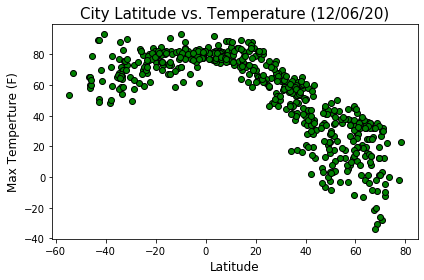

In [245]:
# x axis
lat = clean_city_data["Lat"]

#y axis
max_temp=clean_city_data["Max temp (F)"]

# genarate the axis 
plt.scatter(lat,max_temp,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max Temperture (F)",fontsize=12)

# date of analysis
now = datetime.now()
date=now.strftime('%m/%d/%y')

plt.title(f"City Latitude vs. Temperature ({date})",fontsize=15)
plt.tight_layout()

#save the a PNG image
plt.savefig("output_data/City Latitude vs.Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

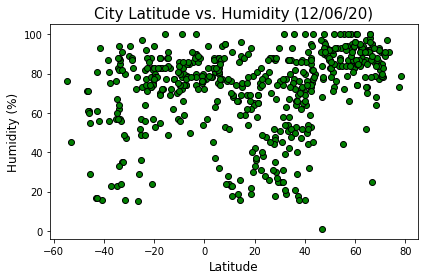

In [246]:
lat = clean_city_data["Lat"]
humidity=clean_city_data["Humidity"]

plt.scatter(lat,humidity,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity (%)",fontsize=12)
now = datetime.now()
date=now.strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({date})",fontsize=15)
plt.tight_layout()
plt.savefig("output_data/City Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

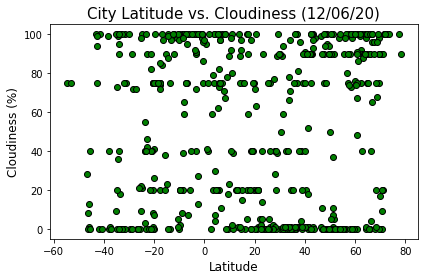

In [247]:
lat = clean_city_data["Lat"]
cloudiness=clean_city_data["Cloudiness"]

plt.scatter(lat,cloudiness,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness (%)",fontsize=12)
now = datetime.now()
date=now.strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Cloudiness ({date})",fontsize=15)
plt.tight_layout()
plt.savefig("output_data/City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

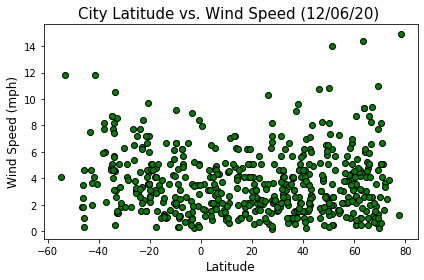

In [248]:
lat = clean_city_data["Lat"]
wind_speed=clean_city_data["Wind speed"]

plt.scatter(lat,wind_speed,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed (mph)",fontsize=12)
now = datetime.now()
date=now.strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Wind Speed ({date}) ",fontsize=15)
plt.tight_layout()
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

plt.show()

## Linear Regression

In [249]:
#create dataframe for Northern Hemisphere
northern = clean_city_data[clean_city_data["Lat"] >= 0].reset_index().drop(["index"],axis=1)
northern.head()

,City,Lat,Lng,Max temp (F),Humidity,Cloudiness,Wind speed,Country,Date
0,Dhidhdhoo,6.88,73.10,81.680,77,100,3.03,MV,1607286034
1,San Patricio,28.02,-97.52,64.400,48,40,7.20,US,1607286034
2,Clyde River,70.47,-68.59,3.200,91,90,5.10,CA,1607285786
3,Karlskoga,59.33,14.52,44.996,93,100,6.70,SE,1607286034
4,Severo-Kuril'sk,50.68,156.12,27.320,90,100,7.34,RU,1607285784


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [250]:
#create dataframe for Southern Hemisphere
southren=clean_city_data[clean_city_data["Lat"]< 0].reset_index().drop(["index"],axis=1)
southren.head()

,City,Lat,Lng,Max temp (F),Humidity,Cloudiness,Wind speed,Country,Date
0,Morón,-34.65,-58.62,77.000,23,0,5.10,AR,1607286034
1,Quatre Cocos,-20.21,57.76,78.008,83,75,3.60,MU,1607285786
2,Chui,-33.70,-53.46,65.966,57,18,4.56,UY,1607286034
3,Esperance,-33.87,121.90,59.000,62,90,4.60,AU,1607285861
4,Bluff,-46.60,168.33,64.994,71,28,1.79,NZ,1607285791


The r-value is: -0.864642333274557


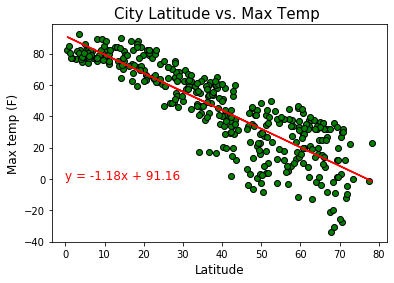

In [261]:
lat_north=northern["Lat"]
max_temp_north=northern["Max temp (F)"]
plt.scatter(lat_north,max_temp_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max temp (F)",fontsize=12)
plt.title("City Latitude vs. Max Temp ",fontsize=15)
# find correlation between the axises
correlation=st.pearsonr(lat_north,max_temp_north)

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, max_temp_north)
#caculate linear equation
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(0,0),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northern City Latitude vs. Max Temp.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5078530369835131


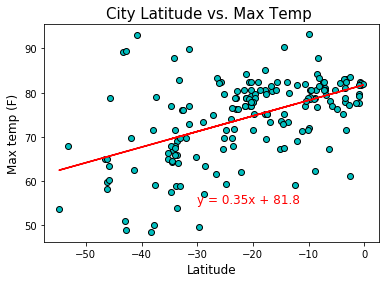

In [254]:
lat_south=southren["Lat"]
max_temp_south=southren["Max temp (F)"]
plt.scatter(lat_south,max_temp_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max temp (F)",fontsize=12)
plt.title("City Latitude vs. Max Temp ",fontsize=15)
correlation=st.pearsonr(lat_south,max_temp_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, max_temp_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-30,55),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Max Temp.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39206797326005927


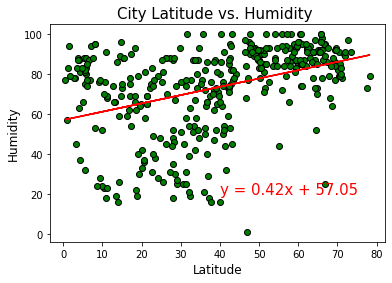

In [260]:
lat_north=northern["Lat"]
humidity_north=northern["Humidity"]
plt.scatter(lat_north,humidity_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity",fontsize=12)
plt.title("City Latitude vs. Humidity ",fontsize=15)
correlation=st.pearsonr(lat_north,humidity_north)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, humidity_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(40,20),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northren City Latitude vs. Humidity.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3876194534852642


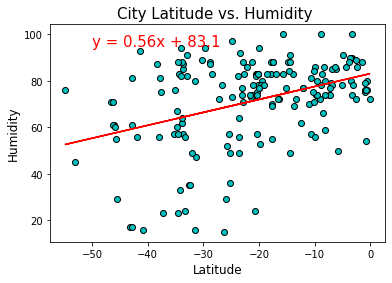

In [255]:
lat_south=southren["Lat"]
humidity_south=southren["Humidity"]
plt.scatter(lat_south,humidity_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity",fontsize=12)
plt.title("City Latitude vs. Humidity ",fontsize=15)
correlation=st.pearsonr(lat_south,humidity_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,humidity_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-50,95),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Humidity.png")

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18415386784110233


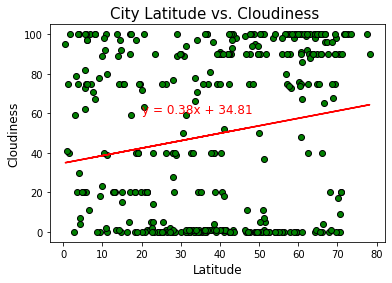

In [256]:
lat_north=northern["Lat"]
cloudiness_north=northern["Cloudiness"]
plt.scatter(lat_north,cloudiness_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness",fontsize=12)
plt.title("City Latitude vs. Cloudiness ",fontsize=15)
correlation=st.pearsonr(lat_north,cloudiness_north)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, cloudiness_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(20,60),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northern City Latitude vs. Cloudiness.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.27941012717654684


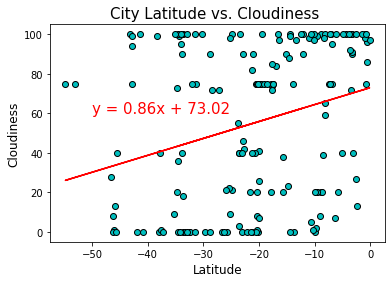

In [257]:
lat_south=southren["Lat"]
cloudiness_south=southren["Cloudiness"]
plt.scatter(lat_south,cloudiness_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness",fontsize=12)
plt.title("City Latitude vs. Cloudiness ",fontsize=15)
correlation=st.pearsonr(lat_south,cloudiness_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,cloudiness_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-50,60),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Cloudiness.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1322617069269053


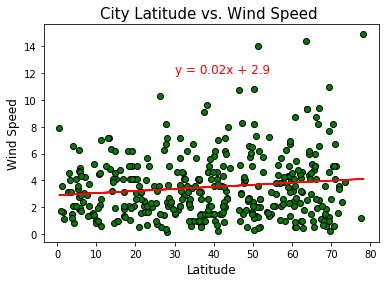

In [258]:
lat_north=northern["Lat"]
wind_speed_north=northern["Wind speed"]
plt.scatter(lat_north,wind_speed_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed",fontsize=12)
plt.title("City Latitude vs. Wind Speed ",fontsize=15)
correlation=st.pearsonr(lat_north,wind_speed_north)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, wind_speed_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(30,12),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northern City Latitude vs. Wind Speed.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24876485592581862


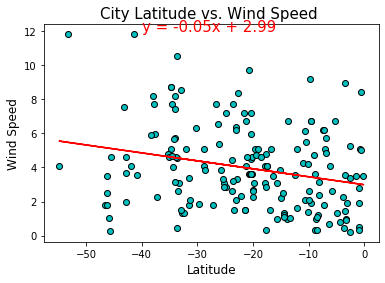

In [259]:
lat_south=southren["Lat"]
wind_speed_south=southren["Wind speed"]
plt.scatter(lat_south,wind_speed_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed",fontsize=12)
plt.title("City Latitude vs. Wind Speed ",fontsize=15)
correlation=st.pearsonr(lat_south,wind_speed_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,wind_speed_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-40,12),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Wind Speed.png")

plt.show()
